In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
df = pd.read_csv("Crop_recommendation.csv")

In [13]:
df.shape

(2200, 8)

-decision tree
-random forest
-naybayes
-knn

In [14]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [15]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [17]:
df.duplicated().sum()

0

In [18]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [19]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [20]:
cat_cols= df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(include = np.number).columns.tolist()

print("Categorical Variables:")
print(cat_cols)
print()
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['label'], dtype='object')

Numerical Variables:
['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']


N
skew : 0.51


C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


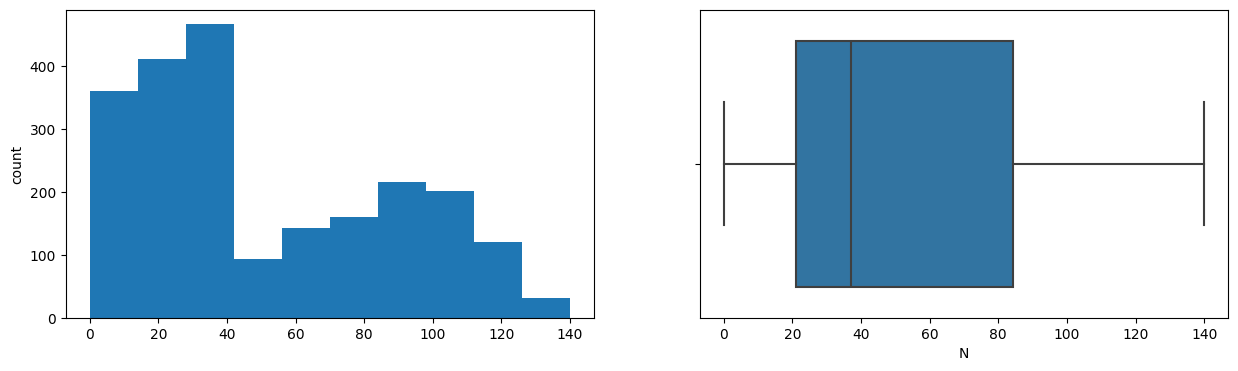

C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


P
skew : 1.01


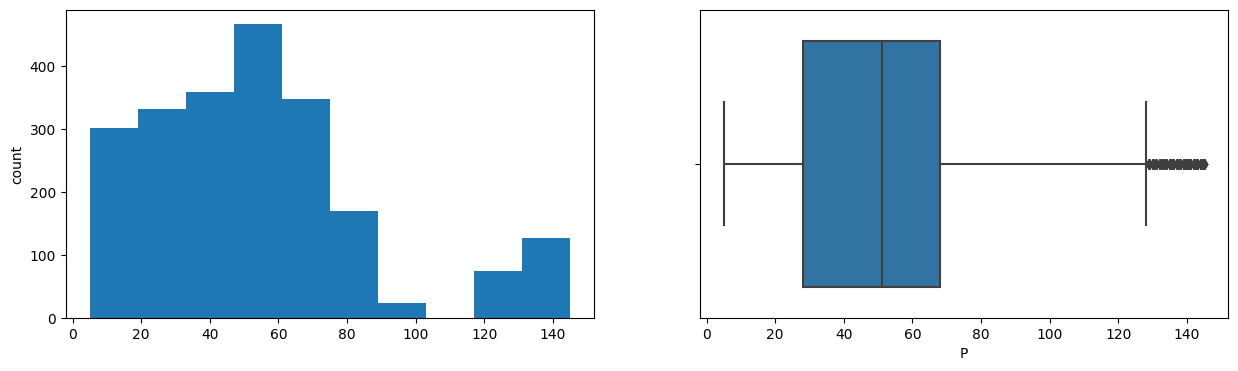

K
skew : 2.38


C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


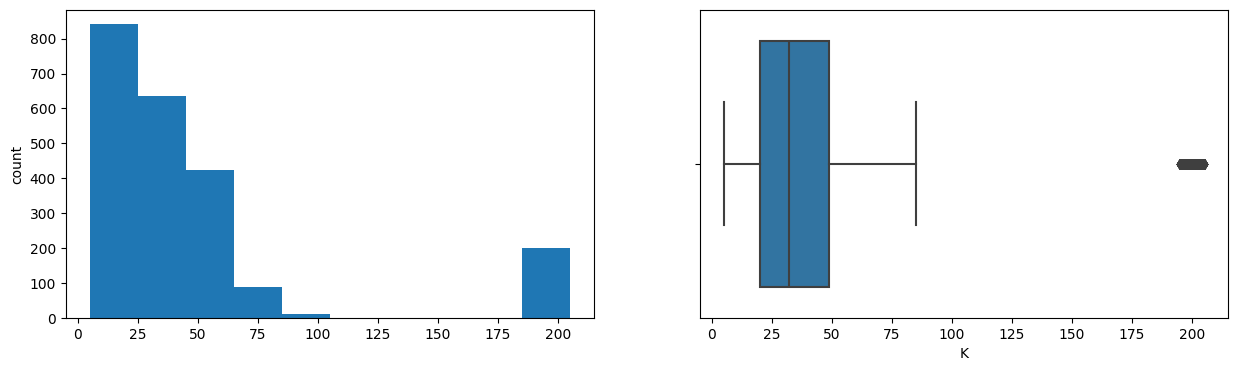

C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


temperature
skew : 0.18


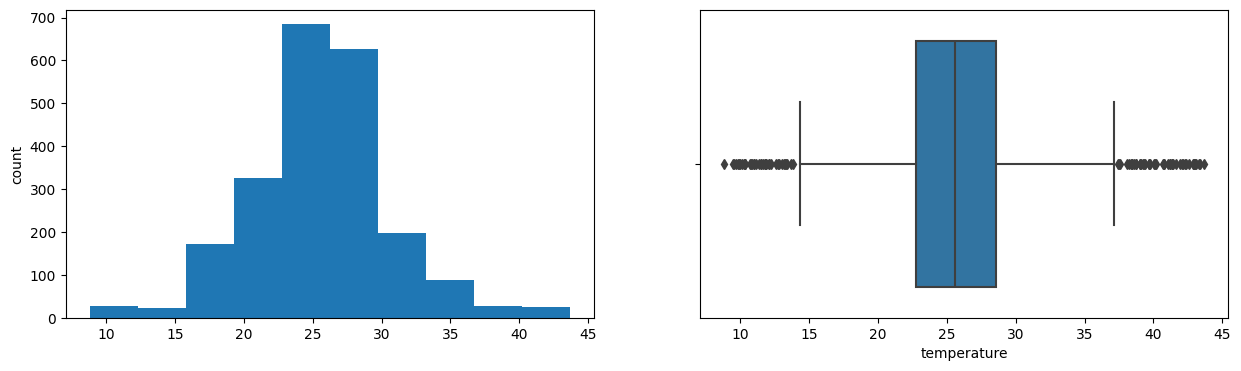

C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


humidity
skew : -1.09


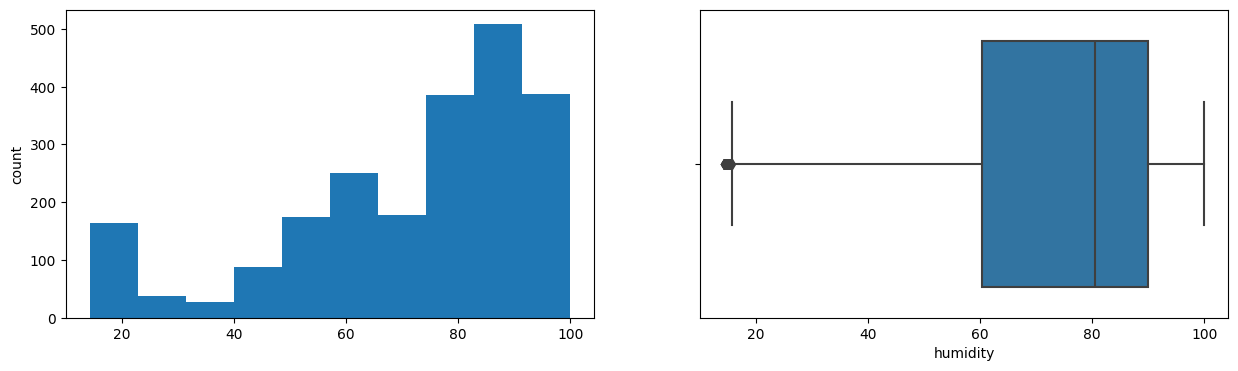

ph
skew : 0.28


C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


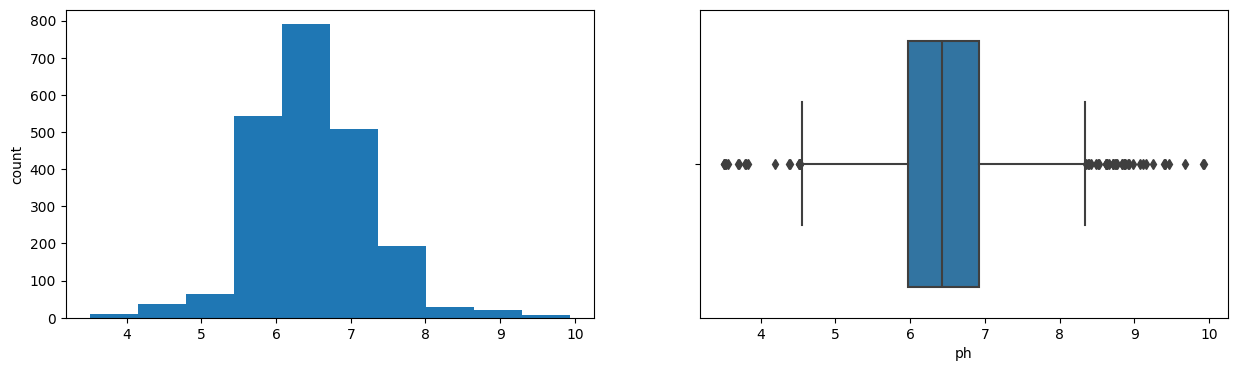

rainfall
skew : 0.97


C:\ProgramData\anaconda3\envs\training\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


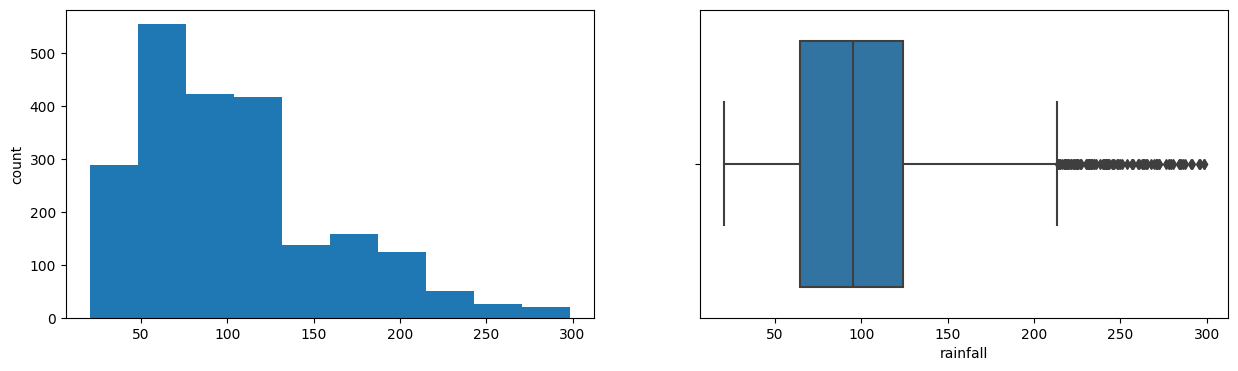

In [21]:
for col in num_cols:
    print(col)
    print('skew :', round(df[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    df[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.show()

In [22]:
label = df["label"].unique()
data = {}
i = 1
for c in label:
    data[c] = i
    i+= 1

In [23]:
data
print(data)

{'rice': 1, 'maize': 2, 'chickpea': 3, 'kidneybeans': 4, 'pigeonpeas': 5, 'mothbeans': 6, 'mungbean': 7, 'blackgram': 8, 'lentil': 9, 'pomegranate': 10, 'banana': 11, 'mango': 12, 'grapes': 13, 'watermelon': 14, 'muskmelon': 15, 'apple': 16, 'orange': 17, 'papaya': 18, 'coconut': 19, 'cotton': 20, 'jute': 21, 'coffee': 22}


In [24]:
df['label'] = df['label'].replace(data)

In [25]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,1


In [26]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,22
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,22
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,22
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,22
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,22


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
scaler = MinMaxScaler()

Orginal_df = df.copy()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [29]:
df

,N,P,K,temperature,humidity,ph,rainfall,label
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458,1
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675,1
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710,1
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905,1
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231,1
...,...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064,22
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972,22
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071,22
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280,22


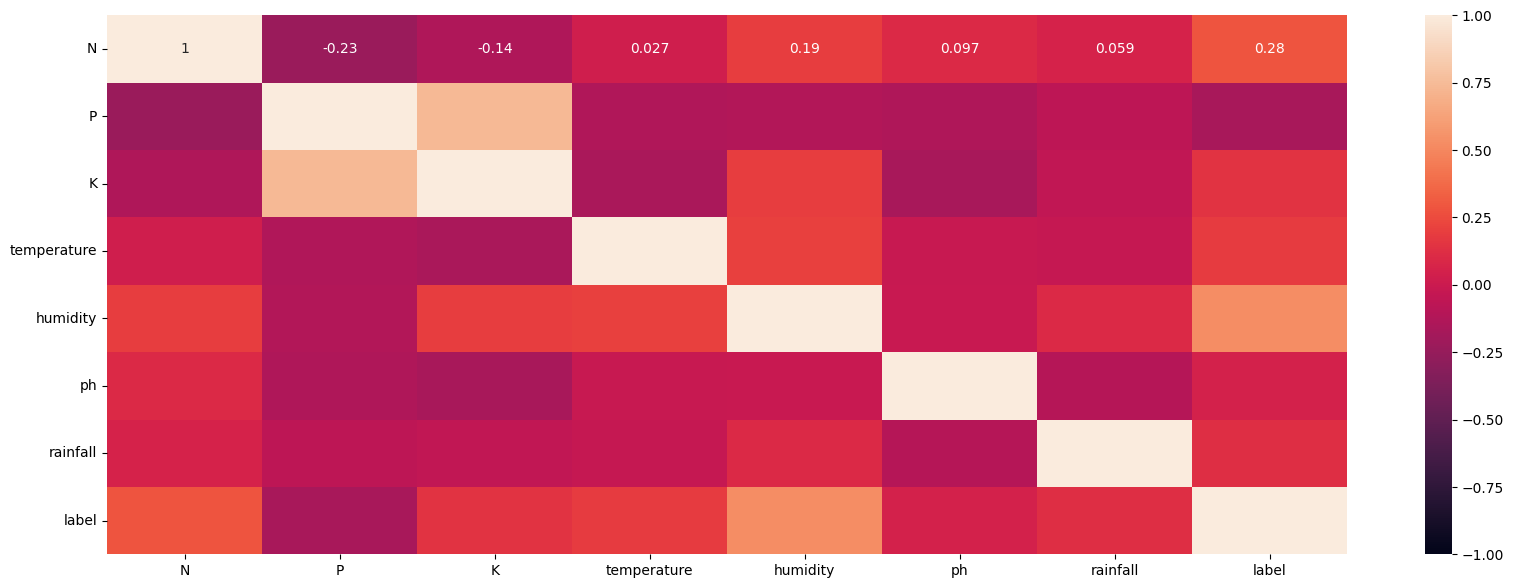

In [30]:
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [32]:
X = df[num_cols]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
random_forest = RandomForestClassifier(random_state=42)
logistic_regression = LogisticRegression()
naive_bayes = GaussianNB()
decision_tree = DecisionTreeClassifier(random_state=42)
knn = KNeighborsClassifier()

In [34]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [35]:
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [36]:
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [37]:
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [39]:
rf_predictions = random_forest.predict(X_test)
lr_predictions = logistic_regression.predict(X_test)
nb_predictions = naive_bayes.predict(X_test)
dt_predictions = decision_tree.predict(X_test)
knn_predictions = knn.predict(X_test)

In [40]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
lr_accuracy = accuracy_score(y_test, lr_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)
dt_accuracy = accuracy_score(y_test, dt_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)

In [41]:
print(f"Random Forest Accuracy: {rf_accuracy}")
print(f"Logistic Regression Accuracy: {lr_accuracy}")
print(f"Naive Bayes Accuracy: {nb_accuracy}")
print(f"Decision Tree Accuracy: {dt_accuracy}")
print(f"K-Nearest Neighbors Accuracy: {knn_accuracy}")

Random Forest Accuracy: 0.9931818181818182
Logistic Regression Accuracy: 0.9204545454545454
Naive Bayes Accuracy: 0.9954545454545455
Decision Tree Accuracy: 0.9863636363636363
K-Nearest Neighbors Accuracy: 0.9681818181818181


In [42]:
df2 = df.copy()

In [43]:
df2.drop(['label'],axis=1,inplace = True)

In [44]:
df2

,N,P,K,temperature,humidity,ph,rainfall
0,0.642857,0.264286,0.190,0.345886,0.790267,0.466264,0.656458
1,0.607143,0.378571,0.180,0.371445,0.770633,0.549480,0.741675
2,0.428571,0.357143,0.195,0.406854,0.793977,0.674219,0.875710
3,0.528571,0.214286,0.175,0.506901,0.768751,0.540508,0.799905
4,0.557143,0.264286,0.185,0.324378,0.785626,0.641291,0.871231
...,...,...,...,...,...,...,...
2195,0.764286,0.207143,0.135,0.515037,0.608410,0.509353,0.566064
2196,0.707143,0.071429,0.110,0.533473,0.494359,0.401561,0.386972
2197,0.842857,0.200000,0.125,0.439202,0.617880,0.444433,0.550071
2198,0.835714,0.192857,0.145,0.500627,0.441760,0.506045,0.384280


In [45]:
y_rf = random_forest.predict(df2.iloc[2195:2199])
print(y_rf)

[22 22 22 22]


In [46]:
y_rf = knn.predict(df2.iloc[2195:2199])
print(y_rf)

[22 22 22 22]


In [114]:
import pickle
import joblib
from sklearn.preprocessing import StandardScaler

In [117]:
df = pd.read_csv("Crop_recommendation.csv")
X = df[num_cols]
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [120]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [121]:
joblib.dump(scaler, "scaler_model.joblib")

['scaler_model.joblib']

In [122]:
scaler_cargado = joblib.load("scaler_model.joblib")

In [131]:
nueva_fila = [[78,42,42,20.130175,81.604873,7.628473,262.717340]]
nueva_fila_scaled = scaler_cargado.transform(nueva_fila)

C:\ProgramData\anaconda3\envs\training\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [132]:
with open("knn_trained_model.pkl", 'rb') as archivo_modelo:
    modelo = pickle.load(archivo_modelo)

In [133]:
prediccion = modelo.predict(nueva_fila_scaled)
print(f"prediccion {prediccion[0]}")

prediccion 1


C:\ProgramData\anaconda3\envs\training\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
